In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
# y = 0000000011
# h = 0000000000

In [3]:
iris = datasets.load_iris()

In [7]:
X = iris.data[:, :2]
y = iris.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
X, y = datasets.make_moons(noise=0.3, random_state=0)
# X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

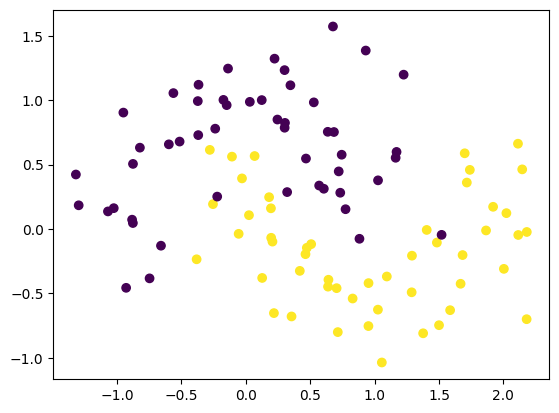

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [11]:
C = 100

svc_liniar = SVC(kernel="linear", C=C).fit(X, y)
svc_rbf = SVC(kernel="rbf", C=C, gamma=0.7).fit(X, y)
svc_poly = SVC(kernel="poly", degree=2, C=C).fit(X, y)

In [12]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [13]:
# xx.ravel(), yy.ravel()

In [14]:
# np.c_[xx.ravel(), yy.ravel()]

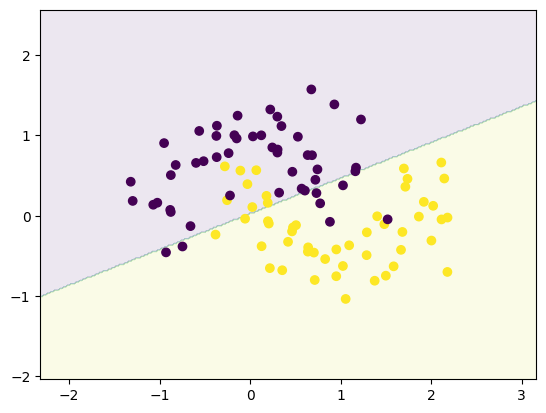

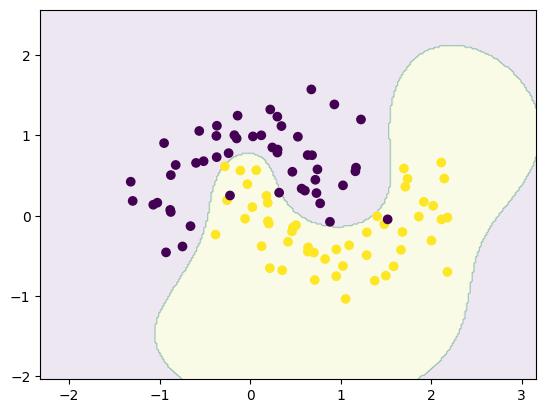

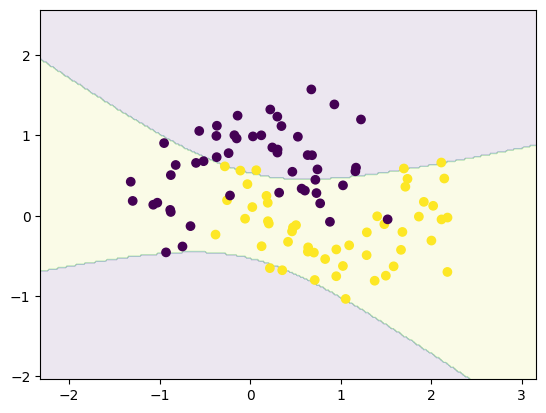

In [15]:
for clf in (svc_liniar, svc_rbf, svc_poly):
    h = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    h = h.reshape(xx.shape)

    plt.contourf(xx, yy, h, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

In [52]:
X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)
X.shape, y.shape

((100, 2), (100,))

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, shuffle=True)

# X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, shuffle=True)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((60, 2), (40, 2), (60,), (40,))

In [62]:
C = 100
svc_poly = SVC(kernel="poly", degree=4, C=C, probability=True).fit(X_train, y_train)

In [76]:
y_valid_pred = svc_poly.predict_proba(X_valid)[:, 1]
y_train_pred = svc_poly.predict_proba(X_train)[:, 1]
# y_valid_pred

In [77]:
accuracy_score(y_train, y_train_pred >= 0.5), accuracy_score(y_valid, y_valid_pred >= 0.5)

(0.8666666666666667, 0.925)

In [78]:
f1_score(y_train, y_train_pred >= 0.5), f1_score(y_valid, y_valid_pred >= 0.5)

(0.870967741935484, 0.9361702127659574)

In [79]:
roc_auc_score(y_train, y_train_pred), roc_auc_score(y_valid, y_valid_pred)

(0.9719416386083053, 0.9411764705882353)

In [85]:
Cs = [0.01, 0.1, 1., 10., 100.]
degrees = [1, 2, 3, 4, 5]

for C in Cs:
    for degree in degrees:
        svc_poly = SVC(kernel="poly", degree=degree, C=C, probability=True).fit(X_train, y_train)

        y_train_pred = svc_poly.predict_proba(X_train)[:, 1]
        y_valid_pred = svc_poly.predict_proba(X_valid)[:, 1]

        metric_train = f1_score(y_train, y_train_pred >= 0.5)
        metric_valid = f1_score(y_valid, y_valid_pred >= 0.5)

        print(f"{C=}, {degree=}, {metric_train=:.2f}, {metric_valid=:.3f}")

C=0.01, degree=1, metric_train=0.62, metric_valid=0.730
C=0.01, degree=2, metric_train=0.00, metric_valid=0.000
C=0.01, degree=3, metric_train=0.00, metric_valid=0.000
C=0.01, degree=4, metric_train=0.00, metric_valid=0.000
C=0.01, degree=5, metric_train=0.62, metric_valid=0.730
C=0.1, degree=1, metric_train=0.42, metric_valid=0.526
C=0.1, degree=2, metric_train=0.86, metric_valid=0.936
C=0.1, degree=3, metric_train=0.62, metric_valid=0.754
C=0.1, degree=4, metric_train=0.89, metric_valid=0.936
C=0.1, degree=5, metric_train=0.62, metric_valid=0.730
C=1.0, degree=1, metric_train=0.00, metric_valid=0.000
C=1.0, degree=2, metric_train=0.91, metric_valid=0.936
C=1.0, degree=3, metric_train=0.00, metric_valid=0.000
C=1.0, degree=4, metric_train=0.89, metric_valid=0.936
C=1.0, degree=5, metric_train=0.00, metric_valid=0.000
C=10.0, degree=1, metric_train=0.00, metric_valid=0.000
C=10.0, degree=2, metric_train=0.91, metric_valid=0.936
C=10.0, degree=3, metric_train=0.00, metric_valid=0.000
C=

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [88]:
svc_poly = SVC(kernel="poly", probability=True)

In [89]:
params = {
    "C": [0.01, 0.1, 1., 10., 100.],
    "degree": [1, 2, 3, 4, 5],
}

In [98]:
model = GridSearchCV(svc_poly, params, scoring="f1", cv=5, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [99]:
model.best_params_

{'C': 10.0, 'degree': 2}

In [100]:
model.best_score_

0.9126797385620915

In [102]:
best_model = model.best_estimator_

In [104]:
y_test_pred = best_model.predict_proba(X_test)[:, 1]
y_train_pred = best_model.predict_proba(X_train)[:, 1]

f1_score(y_train, y_train_pred >= 0.5), f1_score(y_test, y_test_pred >= 0.5)

(0.888888888888889, 0.9565217391304348)